In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./train.csv')

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Cabin'] = df['Cabin'].fillna('N')

str_columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for column in str_columns:
    le = LabelEncoder()
    le = le.fit(df[column])
    df[column] = le.transform(df[column])
    

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis='columns'), df['Survived'])

In [4]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:, 1]

In [5]:
# Problem 1 & 2 & 4

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    TN = confusion[0][0]
    FP = confusion[0][1]
    FN = confusion[1][0]
    TP = confusion[1][1]
    
    print('Confusion Matrix')
    print(confusion)
    print(f'TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}\n')
    
    print(f'Negative ratio: {(TN+FP)/(TN+FP+FN+TP)}')
    
    # ROC-AUC print 추가
    print(f'\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}\nAUC:{roc_auc}\n\n')


get_clf_eval(y_test, pred)

Confusion Matrix
[[122  20]
 [ 20  61]]
TN: 122, FP: 20, FN: 20, TP: 61

Negative ratio: 0.6367713004484304

Accuracy: 0.820627802690583
Precision: 0.7530864197530864
Recall: 0.7530864197530864
F1: 0.7530864197530863
AUC:0.8061206746652756




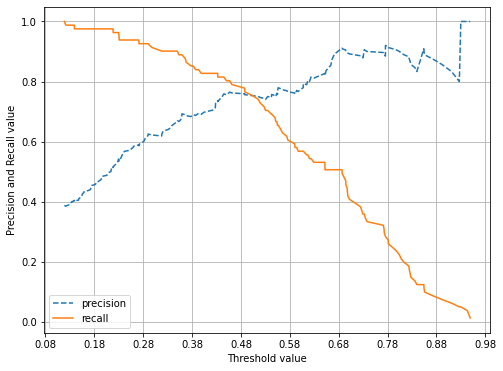

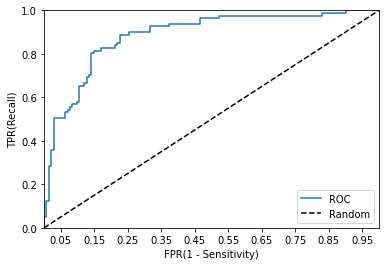

In [6]:
# Problem 3

def precision_recall_curve_plot(y_test, pred):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

    
def roc_curve_plt(y_test, pred):
    fprs, tprs, thresholds = roc_curve(y_test, pred)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
    

precision_recall_curve_plot(y_test, pred_proba)
roc_curve_plt(y_test, pred_proba)

## Problem5-2
- Recall 개선이  필요하다. -> TP를 높여야 한다. -> Positive예측을 늘려야 한다. -> threshold를 낮춰야 한다.

In [7]:
def get_eval_by_threshold(pred_proba):
    thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
    pred_proba_c1 = pred_proba.reshape(-1,1)
    
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('Thresholds:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(pred_proba)

Thresholds: 0.4
Confusion Matrix
[[113  29]
 [ 14  67]]
TN: 113, FP: 29, FN: 14, TP: 67

Negative ratio: 0.6367713004484304

Accuracy: 0.8071748878923767
Precision: 0.6979166666666666
Recall: 0.8271604938271605
F1: 0.7570621468926554
AUC:0.8114675708572423


Thresholds: 0.45
Confusion Matrix
[[121  21]
 [ 16  65]]
TN: 121, FP: 21, FN: 16, TP: 65

Negative ratio: 0.6367713004484304

Accuracy: 0.8340807174887892
Precision: 0.7558139534883721
Recall: 0.8024691358024691
F1: 0.7784431137724551
AUC:0.8272909059294036


Thresholds: 0.5
Confusion Matrix
[[122  20]
 [ 20  61]]
TN: 122, FP: 20, FN: 20, TP: 61

Negative ratio: 0.6367713004484304

Accuracy: 0.820627802690583
Precision: 0.7530864197530864
Recall: 0.7530864197530864
F1: 0.7530864197530863
AUC:0.8061206746652756


Thresholds: 0.55
Confusion Matrix
[[124  18]
 [ 27  54]]
TN: 124, FP: 18, FN: 27, TP: 54

Negative ratio: 0.6367713004484304

Accuracy: 0.7982062780269058
Precision: 0.75
Recall: 0.6666666666666666
F1: 0.7058823529411765
AU

Thresholds = 0.45 정도가 적당해 보인다.